In [60]:
import pandas as pd
from toolz.functoolz import compose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploring the data

## First sight of the records

In [20]:
sourceData = pd.read_csv('../data/train.csv', index_col = 'PassengerId')
sourceData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning the data

Renames the columns to convenient and meaningful strings

In [48]:
def renameColumns(dataFrame):
    dataset = dataFrame.copy()
    dataset.columns = [
        'survived',
        'social_class',
        'name',
        'sex',
        'age',
        'siblings',
        'parch',
        'ticket',
        'fare',
        'cabin',
        'embarked'
    ]
    return dataset

Removes columns that are not related to the event of surviving the catastrophe.

In [49]:
def removeTrashColumns(dataFrame): 
    return dataFrame.drop(columns = ['name', 'cabin', 'ticket'])

In [50]:
cleanPipeline = compose(removeTrashColumns, renameColumns)

In [51]:
data = cleanPipeline(sourceData)
data.head()

,survived,social_class,sex,age,siblings,parch,fare,embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Are age and sex related to survive?

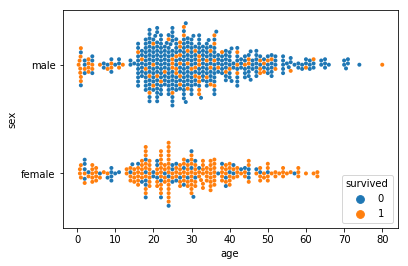

In [56]:
_ = sns.swarmplot(
    x ='age',
    y = 'sex',
    hue = 'survived',
    data = data,
    s = 4
)

_ = plt.xlabel('age')
_ = plt.ylabel('sex')


plt.show()

We can see that women and children tend to survive in the event, some men survived but is not the majority of the cases.

In [69]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

sex_measurement = data.sex.map(lambda sex: 0 if sex == 'male' else 1)
survival_measurement = data.survived

pearson_r(survival_measurement, sex_measurement)

0.5433513806577555

Given that the Pearson correlation coefficient is positive (0.543), exists a positive relation between the sex and the event that the person has survived or not.

In [71]:
age_measurement = data.dropna().age
survival_measurement = data.dropna().survived

pearson_r(age_measurement, survival_measurement)

-0.08244586804341388

On the other hand, for the age case, as the coefficient is a little smaller than zero, it exists a slightly neg